In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

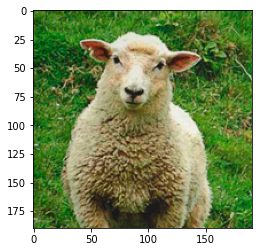

In [2]:
img = cv.imread('TP4/Imagen5.png')
img_show = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.cvtColor(img, cv.COLOR_BGR2LAB)
plt.imshow(img_show)
plt.show()

In [3]:
features = img.reshape((-1,3))
print('Dimensión de la matriz de características (espacio RGB): {}'.format(features.shape))
features = np.float32(features)

Dimensión de la matriz de características (espacio RGB): (36290, 3)


In [4]:
# Definimos el criterio de detención (Epsilon e iteraciones máximas) y número de clústers (K)
criteria = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 30, 1.0)
K = 2

# Corremos el algoritmo de K-means con:
# - El criterio de detención predefinido
# - 10 ejecuciones del algoritmo distintos parametros iniciales (devuelve los centros de la corrida que de grupos más compactos)
# - Parámetro de incialización de las semillas (aleatorio)
compact, label, color_clusters = cv.kmeans(features, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [5]:
# Mostramos los centroides (colores) que representan cada cluster encontrado
color_clusters = np.uint8(color_clusters)
print(f'Centroides: \n {color_clusters} \n')
# La función también devuelve un parámetro de "compactación" basado en las diferencias cuadradas entre las muestras y los centros hallados  
compact = np.uint8(compact)
print('Compactación: \n {} \n'.format(compact))
label[:4]

Centroides: 
 [[ 99 106 160]
 [179 121 151]] 

Compactación: 
 48 



array([[0],
       [0],
       [0],
       [0]], dtype=int32)

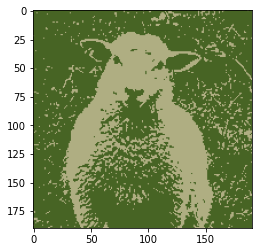

In [6]:
# Cada píxel que corresponde a un grupo tiene copiado como etiqueta el color al que corresponde.
# Hacemos un reshape al tamaño original de la matriz de imagen 
img_out = color_clusters[label.flatten()]
img_out = img_out.reshape((img.shape))

# Mostramos la imagen compuesta
img_out_show = cv.cvtColor(img_out, cv.COLOR_LAB2RGB)
plt.imshow(img_out_show)
plt.show()

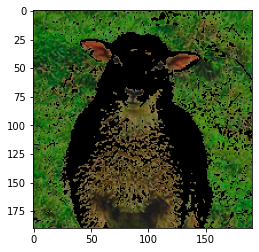

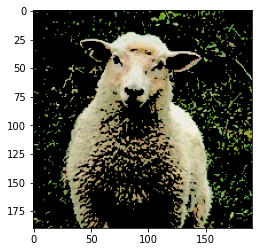

In [7]:
mask_list = list()
for cluster in color_clusters:
  mask = np.zeros(img_out.shape[:2],'uint8')
  mask[np.where((img_out == cluster).all(axis=2))] = 255
  mask_list.append(mask)

for i, mask in enumerate(mask_list):
    img_segmented = cv.bitwise_and(img_show, img_show, mask = mask)
    plt.imshow(img_segmented)
    plt.show()
    # print(mask)

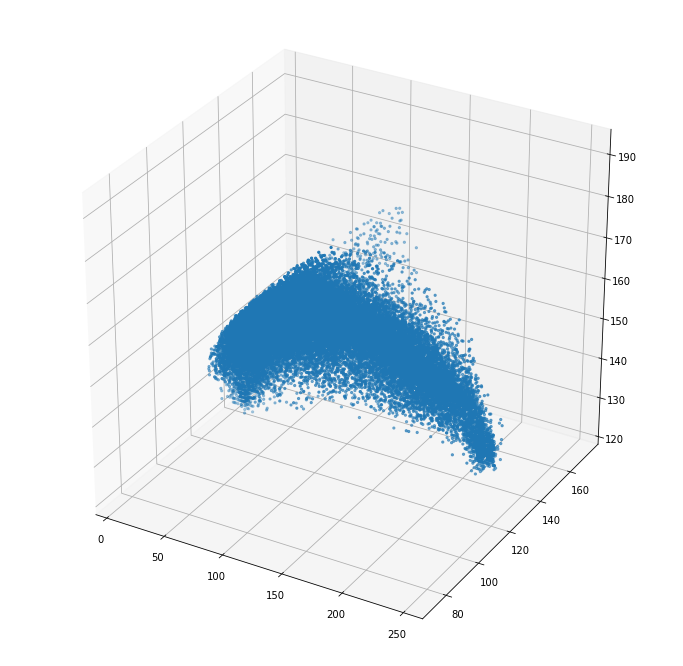

In [8]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(features[:,0], features[:,1], features[:,2], marker=".")
plt.show()

In [9]:
features = img.reshape((-1,3))
features2=[]
column_count=-1
for index, value in enumerate(features):
    if index%img.shape[1]==0:
        column_count+=1
    features2.append([value[0],value[1],value[2], index-(img.shape[0]+1)*column_count, column_count])
features = np.array(features2)
features = np.float32(features)
print('Dimensión de la matriz de características (espacio RGB): {}'.format(features.shape))

Dimensión de la matriz de características (espacio RGB): (36290, 5)


In [10]:
criteria = (cv.TERM_CRITERIA_MAX_ITER + cv.TERM_CRITERIA_EPS, 30, 1.0)
K = 2
compact, label, color_clusters = cv.kmeans(features, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [11]:
# Mostramos los centroides (colores) que representan cada cluster encontrado
color_clusters = np.uint8(color_clusters)
print(f'Centroides: \n {color_clusters} \n')
# La función también devuelve un parámetro de "compactación" basado en las diferencias cuadradas entre las muestras y los centros hallados  
compact = np.uint8(compact)
print('Compactación: \n {} \n'.format(compact))
label[:4]

Centroides: 
 [[109 112 156  48 105]
 [139 109 158 139  84]] 

Compactación: 
 213 



array([[0],
       [0],
       [0],
       [0]], dtype=int32)

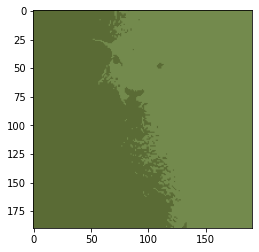

In [12]:
# Cada píxel que corresponde a un grupo tiene copiado como etiqueta el color al que corresponde.
# Hacemos un reshape al tamaño original de la matriz de imagen 
img_out = color_clusters[label.flatten()]
img_out = img_out[:,:3].reshape((img.shape))

# Mostramos la imagen compuesta
img_out_show = cv.cvtColor(img_out, cv.COLOR_LAB2RGB)
plt.imshow(img_out_show)
plt.show()

(190, 191, 3) (5,)
(190, 191, 3) (5,)


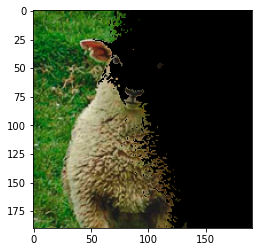

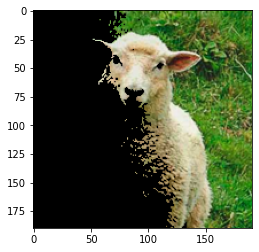

In [13]:
mask_list = list()
for cluster in color_clusters:
  mask = np.zeros(img_out.shape[:2],'uint8')
  print(img_out.shape, cluster.shape)
  mask[np.where((img_out == cluster[:3]).all(axis=2))] = 255
  mask_list.append(mask)

for i, mask in enumerate(mask_list):
    img_segmented = cv.bitwise_and(img_show, img_show, mask = mask)
    plt.imshow(img_segmented)
    plt.show()
    # print(mask)

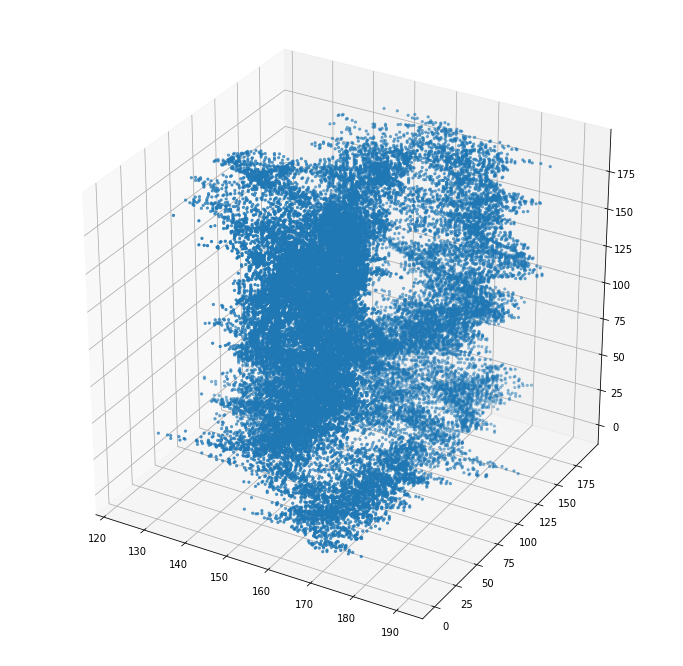

In [14]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(features[:,2], features[:,3], features[:,4], marker=".")
plt.show()